In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import html
import ftfy
import os

import nltk
from nltk import word_tokenize 
from nltk.util import ngrams
from collections import defaultdict
from nltk.corpus import stopwords
import string, re
from scipy.stats import norm
from collections import Counter

from tqdm.notebook import tqdm

warnings.filterwarnings("ignore")

import torch
import torch.nn as nn


import torch.optim as optim
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

import random

from spellchecker import SpellChecker

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
def clean(tweet): 
    
    tweet= html.unescape(tweet)
    tweet= ftfy.fix_text(tweet)
    
            
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
    tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
    tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
    tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
    tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    
    # Hashtags and usernames
    tweet = re.sub(r"IranDeal", "Iran Deal", tweet)
    tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
    tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
    tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
    tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
    tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
    tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
    tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
    tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
    tweet = re.sub(r"socialnews", "social news", tweet)
    tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
    tweet = re.sub(r"onlinecommunities", "online communities", tweet)
    tweet = re.sub(r"humanconsumption", "human consumption", tweet)
    tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
    tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
    tweet = re.sub(r"facialabuse", "facial abuse", tweet)
    tweet = re.sub(r"LakeCounty", "Lake County", tweet)
    tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
    tweet = re.sub(r"withheavenly", "with heavenly", tweet)
    tweet = re.sub(r"thankU", "thank you", tweet)
    tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
    tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
    tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
    tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
    tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
    tweet = re.sub(r"animalrescue", "animal rescue", tweet)
    tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
    tweet = re.sub(r"aRmageddon", "armageddon", tweet)
    tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
    tweet = re.sub(r"GodsLove", "God's Love", tweet)
    tweet = re.sub(r"bookboost", "book boost", tweet)
    tweet = re.sub(r"ibooklove", "I book love", tweet)
    tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
    tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
    tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
    tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
    tweet = re.sub(r"weathernetwork", "weather network", tweet)
    tweet = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", tweet)
    tweet = re.sub(r"Hostage&2", "Hostage & 2", tweet)
    tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
    tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
    tweet = re.sub(r"frontpage", "front page", tweet)
    tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
    tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
    tweet = re.sub(r"til_now", "until now", tweet)
    tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
    tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
    tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
    tweet = re.sub(r"53inch", "53 inch", tweet)
    tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
    tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
    tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
    tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
    tweet = re.sub(r"DETECTADO", "Detected", tweet)
    tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
    tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
    tweet = re.sub(r"NickCannon", "Nick Cannon", tweet)
    tweet = re.sub(r"FaroeIslands", "Faroe Islands", tweet)
    tweet = re.sub(r"yycstorm", "Calgary Storm", tweet)
    tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
    tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
    tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
    tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
    tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
    tweet = re.sub(r"UTC2015", "UTC 2015", tweet)
    tweet = re.sub(r"Time2015", "Time 2015", tweet)
    tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
    tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
    tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
    tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
    tweet = re.sub(r"bbcnews", "bbc news", tweet)
    tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
    tweet = re.sub(r"c4news", "c4 news", tweet)
    tweet = re.sub(r"OBLITERATION", "obliteration", tweet)
    tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
    tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
    tweet = re.sub(r"NotExplained", "Not Explained", tweet)
    tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
    tweet = re.sub(r"LondonFire", "London Fire", tweet)
    tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
    tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
    tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
    tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
    tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
    tweet = re.sub(r"nikeplus", "nike plus", tweet)
    tweet = re.sub(r"david_cameron", "David Cameron", tweet)
    tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
    tweet = re.sub(r"JamesMelville", "James Melville", tweet)
    tweet = re.sub(r"megynkelly", "Megyn Kelly", tweet)
    tweet = re.sub(r"cnewslive", "C News Live", tweet)
    tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
    tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
    tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
    tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
    tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"cjoyner", "Chris Joyner", tweet)
    tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
    tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)
    tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
    tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
    tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
    tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
    tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
    tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
    tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
    tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
    tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
    tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
    tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
    tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
    tweet = re.sub(r"GRupdates", "GR updates", tweet)
    tweet = re.sub(r"SouthDowns", "South Downs", tweet)
    tweet = re.sub(r"braininjury", "brain injury", tweet)
    tweet = re.sub(r"auspol", "Australian politics", tweet)
    tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
    tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
    tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
    tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
    tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
    tweet = re.sub(r"S3XLEAK", "sex leak", tweet)
    tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
    tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
    tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
    tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
    tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
    tweet = re.sub(r"offers2go", "offers to go", tweet)
    tweet = re.sub(r"foodscare", "food scare", tweet)
    tweet = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", tweet)
    tweet = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", tweet)
    tweet = re.sub(r"GamerGate", "Gamer Gate", tweet)
    tweet = re.sub(r"IHHen", "Humanitarian Relief", tweet)
    tweet = re.sub(r"spinningbot", "spinning bot", tweet)
    tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
    tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
    tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
    tweet = re.sub(r"po_st", "po.st", tweet)
    tweet = re.sub(r"scoopit", "scoop.it", tweet)
    tweet = re.sub(r"UltimaLucha", "Ultima Lucha", tweet)
    tweet = re.sub(r"JonathanFerrell", "Jonathan Ferrell", tweet)
    tweet = re.sub(r"aria_ahrary", "Aria Ahrary", tweet)
    tweet = re.sub(r"rapidcity", "Rapid City", tweet)
    tweet = re.sub(r"OutBid", "outbid", tweet)
    tweet = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", tweet)
    tweet = re.sub(r"EudryLantiqua", "Eudry Lantiqua", tweet)
    tweet = re.sub(r"15PM", "15 PM", tweet)
    tweet = re.sub(r"OriginalFunko", "Funko", tweet)
    tweet = re.sub(r"rightwaystan", "Richard Tan", tweet)
    tweet = re.sub(r"CindyNoonan", "Cindy Noonan", tweet)
    tweet = re.sub(r"RT_America", "RT America", tweet)
    tweet = re.sub(r"narendramodi", "Narendra Modi", tweet)
    tweet = re.sub(r"BakeOffFriends", "Bake Off Friends", tweet)
    tweet = re.sub(r"TeamHendrick", "Hendrick Motorsports", tweet)
    tweet = re.sub(r"alexbelloli", "Alex Belloli", tweet)
    tweet = re.sub(r"itsjustinstuart", "Justin Stuart", tweet)
    tweet = re.sub(r"gunsense", "gun sense", tweet)
    tweet = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", tweet)
    tweet = re.sub(r"RoyalCarribean", "Royal Carribean", tweet)
    tweet = re.sub(r"samanthaturne19", "Samantha Turner", tweet)
    tweet = re.sub(r"JonVoyage", "Jon Stewart", tweet)
    tweet = re.sub(r"renew911health", "renew 911 health", tweet)
    tweet = re.sub(r"SuryaRay", "Surya Ray", tweet)
    tweet = re.sub(r"pattonoswalt", "Patton Oswalt", tweet)
    tweet = re.sub(r"minhazmerchant", "Minhaz Merchant", tweet)
    tweet = re.sub(r"TLVFaces", "Israel Diaspora Coalition", tweet)
    tweet = re.sub(r"pmarca", "Marc Andreessen", tweet)
    tweet = re.sub(r"pdx911", "Portland Police", tweet)
    tweet = re.sub(r"jamaicaplain", "Jamaica Plain", tweet)
    tweet = re.sub(r"Japton", "Arkansas", tweet)
    tweet = re.sub(r"RouteComplex", "Route Complex", tweet)
    tweet = re.sub(r"INSubcontinent", "Indian Subcontinent", tweet)
    tweet = re.sub(r"NJTurnpike", "New Jersey Turnpike", tweet)
    tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
    tweet = re.sub(r"Hiroshima70", "Hiroshima", tweet)
    tweet = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", tweet)
    tweet = re.sub(r"versethe", "verse the", tweet)
    tweet = re.sub(r"TubeStrike", "Tube Strike", tweet)
    tweet = re.sub(r"MissionHills", "Mission Hills", tweet)
    tweet = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", tweet)
    tweet = re.sub(r"NANKANA", "Nankana", tweet)
    tweet = re.sub(r"SAHIB", "Sahib", tweet)
    tweet = re.sub(r"PAKPATTAN", "Pakpattan", tweet)
    tweet = re.sub(r"Newz_Sacramento", "News Sacramento", tweet)
    tweet = re.sub(r"gofundme", "go fund me", tweet)
    tweet = re.sub(r"pmharper", "Stephen Harper", tweet)
    tweet = re.sub(r"IvanBerroa", "Ivan Berroa", tweet)
    tweet = re.sub(r"LosDelSonido", "Los Del Sonido", tweet)
    tweet = re.sub(r"bancodeseries", "banco de series", tweet)
    tweet = re.sub(r"timkaine", "Tim Kaine", tweet)
    tweet = re.sub(r"IdentityTheft", "Identity Theft", tweet)
    tweet = re.sub(r"AllLivesMatter", "All Lives Matter", tweet)
    tweet = re.sub(r"mishacollins", "Misha Collins", tweet)
    tweet = re.sub(r"BillNeelyNBC", "Bill Neely", tweet)
    tweet = re.sub(r"BeClearOnCancer", "be clear on cancer", tweet)
    tweet = re.sub(r"Kowing", "Knowing", tweet)
    tweet = re.sub(r"ScreamQueens", "Scream Queens", tweet)
    tweet = re.sub(r"AskCharley", "Ask Charley", tweet)
    tweet = re.sub(r"BlizzHeroes", "Heroes of the Storm", tweet)
    tweet = re.sub(r"BradleyBrad47", "Bradley Brad", tweet)
    tweet = re.sub(r"HannaPH", "Typhoon Hanna", tweet)
    tweet = re.sub(r"meinlcymbals", "MEINL Cymbals", tweet)
    tweet = re.sub(r"Ptbo", "Peterborough", tweet)
    tweet = re.sub(r"cnnbrk", "CNN Breaking News", tweet)
    tweet = re.sub(r"IndianNews", "Indian News", tweet)
    tweet = re.sub(r"savebees", "save bees", tweet)
    tweet = re.sub(r"GreenHarvard", "Green Harvard", tweet)
    tweet = re.sub(r"StandwithPP", "Stand with planned parenthood", tweet)
    tweet = re.sub(r"hermancranston", "Herman Cranston", tweet)
    tweet = re.sub(r"WMUR9", "WMUR-TV", tweet)
    tweet = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", tweet)
    tweet = re.sub(r"ameenshaikh3", "Ameen Shaikh", tweet)
    tweet = re.sub(r"ProSyn", "Project Syndicate", tweet)
    tweet = re.sub(r"Daesh", "ISIS", tweet)
    tweet = re.sub(r"s2g", "swear to god", tweet)
    tweet = re.sub(r"listenlive", "listen live", tweet)
    tweet = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", tweet)
    tweet = re.sub(r"FoxNew", "Fox News", tweet)
    tweet = re.sub(r"CBSBigBrother", "Big Brother", tweet)
    tweet = re.sub(r"JulieDiCaro", "Julie DiCaro", tweet)
    tweet = re.sub(r"theadvocatemag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", tweet)
    tweet = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", tweet)
    tweet = re.sub(r"Popularmmos", "Popular MMOs", tweet)
    tweet = re.sub(r"WildHorses", "Wild Horses", tweet)
    tweet = re.sub(r"FantasticFour", "Fantastic Four", tweet)
    tweet = re.sub(r"HORNDALE", "Horndale", tweet)
    tweet = re.sub(r"PINER", "Piner", tweet)
    tweet = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", tweet)
    tweet = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", tweet)
    tweet = re.sub(r"residualincome", "residual income", tweet)
    tweet = re.sub(r"YahooNewsDigest", "Yahoo News Digest", tweet)
    tweet = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", tweet)
    tweet = re.sub(r"AmazonDeals", "Amazon Deals", tweet)
    tweet = re.sub(r"MissCharleyWebb", "Charley Webb", tweet)
    tweet = re.sub(r"shoalstraffic", "shoals traffic", tweet)
    tweet = re.sub(r"GeorgeFoster72", "George Foster", tweet)
    tweet = re.sub(r"pop2015", "pop 2015", tweet)
    tweet = re.sub(r"_PokemonCards_", "Pokemon Cards", tweet)
    tweet = re.sub(r"DianneG", "Dianne Gallagher", tweet)
    tweet = re.sub(r"KashmirConflict", "Kashmir Conflict", tweet)
    tweet = re.sub(r"BritishBakeOff", "British Bake Off", tweet)
    tweet = re.sub(r"FreeKashmir", "Free Kashmir", tweet)
    tweet = re.sub(r"mattmosley", "Matt Mosley", tweet)
    tweet = re.sub(r"BishopFred", "Bishop Fred", tweet)
    tweet = re.sub(r"EndConflict", "End Conflict", tweet)
    tweet = re.sub(r"EndOccupation", "End Occupation", tweet)
    tweet = re.sub(r"UNHEALED", "unhealed", tweet)
    tweet = re.sub(r"CharlesDagnall", "Charles Dagnall", tweet)
    tweet = re.sub(r"Latestnews", "Latest news", tweet)
    tweet = re.sub(r"KindleCountdown", "Kindle Countdown", tweet)
    tweet = re.sub(r"NoMoreHandouts", "No More Handouts", tweet)
    tweet = re.sub(r"datingtips", "dating tips", tweet)
    tweet = re.sub(r"charlesadler", "Charles Adler", tweet)
    tweet = re.sub(r"twia", "Texas Windstorm Insurance Association", tweet)
    tweet = re.sub(r"txlege", "Texas Legislature", tweet)
    tweet = re.sub(r"WindstormInsurer", "Windstorm Insurer", tweet)
    tweet = re.sub(r"Newss", "News", tweet)
    tweet = re.sub(r"hempoil", "hemp oil", tweet)
    tweet = re.sub(r"CommoditiesAre", "Commodities are", tweet)
    tweet = re.sub(r"tubestrike", "tube strike", tweet)
    tweet = re.sub(r"JoeNBC", "Joe Scarborough", tweet)
    tweet = re.sub(r"LiteraryCakes", "Literary Cakes", tweet)
    tweet = re.sub(r"TI5", "The International 5", tweet)
    tweet = re.sub(r"thehill", "the hill", tweet)
    tweet = re.sub(r"3others", "3 others", tweet)
    tweet = re.sub(r"stighefootball", "Sam Tighe", tweet)
    tweet = re.sub(r"whatstheimportantvideo", "what is the important video", tweet)
    tweet = re.sub(r"ClaudioMeloni", "Claudio Meloni", tweet)
    tweet = re.sub(r"DukeSkywalker", "Duke Skywalker", tweet)
    tweet = re.sub(r"carsonmwr", "Fort Carson", tweet)
    tweet = re.sub(r"offdishduty", "off dish duty", tweet)
    tweet = re.sub(r"andword", "and word", tweet)
    tweet = re.sub(r"rhodeisland", "Rhode Island", tweet)
    tweet = re.sub(r"easternoregon", "Eastern Oregon", tweet)
    tweet = re.sub(r"WAwildfire", "Washington Wildfire", tweet)
    tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
    tweet = re.sub(r"57am", "57 am", tweet)
    tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
    tweet = re.sub(r"JacobHoggard", "Jacob Hoggard", tweet)
    tweet = re.sub(r"newnewnew", "new new new", tweet)
    tweet = re.sub(r"under50", "under 50", tweet)
    tweet = re.sub(r"getitbeforeitsgone", "get it before it is gone", tweet)
    tweet = re.sub(r"freshoutofthebox", "fresh out of the box", tweet)
    tweet = re.sub(r"amwriting", "am writing", tweet)
    tweet = re.sub(r"Bokoharm", "Boko Haram", tweet)
    tweet = re.sub(r"Nowlike", "Now like", tweet)
    tweet = re.sub(r"seasonfrom", "season from", tweet)
    tweet = re.sub(r"epicente", "epicenter", tweet)
    tweet = re.sub(r"epicenterr", "epicenter", tweet)
    tweet = re.sub(r"sicklife", "sick life", tweet)
    tweet = re.sub(r"yycweather", "Calgary Weather", tweet)
    tweet = re.sub(r"calgarysun", "Calgary Sun", tweet)
    tweet = re.sub(r"approachng", "approaching", tweet)
    tweet = re.sub(r"evng", "evening", tweet)
    tweet = re.sub(r"Sumthng", "something", tweet)
    tweet = re.sub(r"EllenPompeo", "Ellen Pompeo", tweet)
    tweet = re.sub(r"shondarhimes", "Shonda Rhimes", tweet)
    tweet = re.sub(r"ABCNetwork", "ABC Network", tweet)
    tweet = re.sub(r"SushmaSwaraj", "Sushma Swaraj", tweet)
    tweet = re.sub(r"pray4japan", "Pray for Japan", tweet)
    tweet = re.sub(r"hope4japan", "Hope for Japan", tweet)
    tweet = re.sub(r"Illusionimagess", "Illusion images", tweet)
    tweet = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", tweet)
    tweet = re.sub(r"ShallWeDance", "Shall We Dance", tweet)
    tweet = re.sub(r"TCMParty", "TCM Party", tweet)
    tweet = re.sub(r"marijuananews", "marijuana news", tweet)
    tweet = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", tweet)
    tweet = re.sub(r"Beingtweets", "Being tweets", tweet)
    tweet = re.sub(r"newauthors", "new authors", tweet)
    tweet = re.sub(r"remedyyyy", "remedy", tweet)
    tweet = re.sub(r"44PM", "44 PM", tweet)
    tweet = re.sub(r"HeadlinesApp", "Headlines App", tweet)
    tweet = re.sub(r"40PM", "40 PM", tweet)
    tweet = re.sub(r"myswc", "Severe Weather Center", tweet)
    tweet = re.sub(r"ithats", "that is", tweet)
    tweet = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", tweet)
    tweet = re.sub(r"FatLoss", "Fat Loss", tweet)
    tweet = re.sub(r"02PM", "02 PM", tweet)
    tweet = re.sub(r"MetroFmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"Bstrd", "bastard", tweet)
    tweet = re.sub(r"bldy", "bloody", tweet)
    tweet = re.sub(r"MetrofmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"terrorismturn", "terrorism turn", tweet)
    tweet = re.sub(r"BBCNewsAsia", "BBC News Asia", tweet)
    tweet = re.sub(r"BehindTheScenes", "Behind The Scenes", tweet)
    tweet = re.sub(r"GeorgeTakei", "George Takei", tweet)
    tweet = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", tweet)
    tweet = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", tweet)
    tweet = re.sub(r"incubusband", "incubus band", tweet)
    tweet = re.sub(r"Babypicturethis", "Baby picture this", tweet)
    tweet = re.sub(r"BombEffects", "Bomb Effects", tweet)
    tweet = re.sub(r"win10", "Windows 10", tweet)
    tweet = re.sub(r"idkidk", "I do not know I do not know", tweet)
    tweet = re.sub(r"TheWalkingDead", "The Walking Dead", tweet)
    tweet = re.sub(r"amyschumer", "Amy Schumer", tweet)
    tweet = re.sub(r"crewlist", "crew list", tweet)
    tweet = re.sub(r"Erdogans", "Erdogan", tweet)
    tweet = re.sub(r"BBCLive", "BBC Live", tweet)
    tweet = re.sub(r"TonyAbbottMHR", "Tony Abbott", tweet)
    tweet = re.sub(r"paulmyerscough", "Paul Myerscough", tweet)
    tweet = re.sub(r"georgegallagher", "George Gallagher", tweet)
    tweet = re.sub(r"JimmieJohnson", "Jimmie Johnson", tweet)
    tweet = re.sub(r"pctool", "pc tool", tweet)
    tweet = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", tweet)
    tweet = re.sub(r"ThrowbackThursday", "Throwback Thursday", tweet)
    tweet = re.sub(r"SnowBackSunday", "Snowback Sunday", tweet)
    tweet = re.sub(r"LakeEffect", "Lake Effect", tweet)
    tweet = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", tweet)
    tweet = re.sub(r"BigBang_CBS", "Big Bang CBS", tweet)
    tweet = re.sub(r"writerslife", "writers life", tweet)
    tweet = re.sub(r"NaturalBirth", "Natural Birth", tweet)
    tweet = re.sub(r"UnusualWords", "Unusual Words", tweet)
    tweet = re.sub(r"wizkhalifa", "Wiz Khalifa", tweet)
    tweet = re.sub(r"acreativedc", "a creative DC", tweet)
    tweet = re.sub(r"vscodc", "vsco DC", tweet)
    tweet = re.sub(r"VSCOcam", "vsco camera", tweet)
    tweet = re.sub(r"TheBEACHDC", "The beach DC", tweet)
    tweet = re.sub(r"buildingmuseum", "building museum", tweet)
    tweet = re.sub(r"WorldOil", "World Oil", tweet)
    tweet = re.sub(r"redwedding", "red wedding", tweet)
    tweet = re.sub(r"AmazingRaceCanada", "Amazing Race Canada", tweet)
    tweet = re.sub(r"WakeUpAmerica", "Wake Up America", tweet)
    tweet = re.sub(r"\\Allahuakbar\\", "Allahu Akbar", tweet)
    tweet = re.sub(r"bleased", "blessed", tweet)
    tweet = re.sub(r"nigeriantribune", "Nigerian Tribune", tweet)
    tweet = re.sub(r"HIDEO_KOJIMA_EN", "Hideo Kojima", tweet)
    tweet = re.sub(r"FusionFestival", "Fusion Festival", tweet)
    tweet = re.sub(r"50Mixed", "50 Mixed", tweet)
    tweet = re.sub(r"NoAgenda", "No Agenda", tweet)
    tweet = re.sub(r"WhiteGenocide", "White Genocide", tweet)
    tweet = re.sub(r"dirtylying", "dirty lying", tweet)
    tweet = re.sub(r"SyrianRefugees", "Syrian Refugees", tweet)
    tweet = re.sub(r"changetheworld", "change the world", tweet)
    tweet = re.sub(r"Ebolacase", "Ebola case", tweet)
    tweet = re.sub(r"mcgtech", "mcg technologies", tweet)
    tweet = re.sub(r"withweapons", "with weapons", tweet)
    tweet = re.sub(r"advancedwarfare", "advanced warfare", tweet)
    tweet = re.sub(r"letsFootball", "let us Football", tweet)
    tweet = re.sub(r"LateNiteMix", "late night mix", tweet)
    tweet = re.sub(r"PhilCollinsFeed", "Phil Collins", tweet)
    tweet = re.sub(r"RudyHavenstein", "Rudy Havenstein", tweet)
    tweet = re.sub(r"22PM", "22 PM", tweet)
    tweet = re.sub(r"54am", "54 AM", tweet)
    tweet = re.sub(r"38am", "38 AM", tweet)
    tweet = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", tweet)
    tweet = re.sub(r"BlacklivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"InsaneLimits", "Insane Limits", tweet)
    tweet = re.sub(r"youcantsitwithus", "you cannot sit with us", tweet)
    tweet = re.sub(r"2k15", "2015", tweet)
    tweet = re.sub(r"TheIran", "Iran", tweet)
    tweet = re.sub(r"JimmyFallon", "Jimmy Fallon", tweet)
    tweet = re.sub(r"AlbertBrooks", "Albert Brooks", tweet)
    tweet = re.sub(r"defense_news", "defense news", tweet)
    tweet = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", tweet)
    tweet = re.sub(r"Auspol", "Australia Politics", tweet)
    tweet = re.sub(r"NuclearPower", "Nuclear Power", tweet)
    tweet = re.sub(r"WhiteTerrorism", "White Terrorism", tweet)
    tweet = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", tweet)
    tweet = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", tweet)
    tweet = re.sub(r"ProBonoNews", "Pro Bono News", tweet)
    tweet = re.sub(r"JakartaPost", "Jakarta Post", tweet)
    tweet = re.sub(r"toopainful", "too painful", tweet)
    tweet = re.sub(r"melindahaunton", "Melinda Haunton", tweet)
    tweet = re.sub(r"NoNukes", "No Nukes", tweet)
    tweet = re.sub(r"curryspcworld", "Currys PC World", tweet)
    tweet = re.sub(r"ineedcake", "I need cake", tweet)
    tweet = re.sub(r"blackforestgateau", "black forest gateau", tweet)
    tweet = re.sub(r"BBCOne", "BBC One", tweet)
    tweet = re.sub(r"AlexxPage", "Alex Page", tweet)
    tweet = re.sub(r"jonathanserrie", "Jonathan Serrie", tweet)
    tweet = re.sub(r"SocialJerkBlog", "Social Jerk Blog", tweet)
    tweet = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", tweet)
    tweet = re.sub(r"irongiant", "iron giant", tweet)
    tweet = re.sub(r"RonFunches", "Ron Funches", tweet)
    tweet = re.sub(r"TimCook", "Tim Cook", tweet)
    tweet = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", tweet)
    tweet = re.sub(r"Madsummer", "Mad summer", tweet)
    tweet = re.sub(r"NowYouKnow", "Now you know", tweet)
    tweet = re.sub(r"concertphotography", "concert photography", tweet)
    tweet = re.sub(r"TomLandry", "Tom Landry", tweet)
    tweet = re.sub(r"showgirldayoff", "show girl day off", tweet)
    tweet = re.sub(r"Yougslavia", "Yugoslavia", tweet)
    tweet = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", tweet)
    tweet = re.sub(r"FromTheDesk", "From The Desk", tweet)
    tweet = re.sub(r"TheaterTrial", "Theater Trial", tweet)
    tweet = re.sub(r"CatoInstitute", "Cato Institute", tweet)
    tweet = re.sub(r"EmekaGift", "Emeka Gift", tweet)
    tweet = re.sub(r"LetsBe_Rational", "Let us be rational", tweet)
    tweet = re.sub(r"Cynicalreality", "Cynical reality", tweet)
    tweet = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", tweet)
    tweet = re.sub(r"NotSorry", "not sorry", tweet)
    tweet = re.sub(r"UseYourWords", "use your words", tweet)
    tweet = re.sub(r"WordoftheDay", "word of the day", tweet)
    tweet = re.sub(r"Dictionarycom", "Dictionary.com", tweet)
    tweet = re.sub(r"TheBrooklynLife", "The Brooklyn Life", tweet)
    tweet = re.sub(r"jokethey", "joke they", tweet)
    tweet = re.sub(r"nflweek1picks", "NFL week 1 picks", tweet)
    tweet = re.sub(r"uiseful", "useful", tweet)
    tweet = re.sub(r"JusticeDotOrg", "The American Association for Justice", tweet)
    tweet = re.sub(r"autoaccidents", "auto accidents", tweet)
    tweet = re.sub(r"SteveGursten", "Steve Gursten", tweet)
    tweet = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", tweet)
    tweet = re.sub(r"birdgang", "bird gang", tweet)
    tweet = re.sub(r"nflnetwork", "NFL Network", tweet)
    tweet = re.sub(r"NYDNSports", "NY Daily News Sports", tweet)
    tweet = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", tweet)
    tweet = re.sub(r"EdmontonEsks", "Edmonton Eskimos", tweet)
    tweet = re.sub(r"david_brelsford", "David Brelsford", tweet)
    tweet = re.sub(r"TOI_India", "The Times of India", tweet)
    tweet = re.sub(r"hegot", "he got", tweet)
    tweet = re.sub(r"SkinsOn9", "Skins on 9", tweet)
    tweet = re.sub(r"sothathappened", "so that happened", tweet)
    tweet = re.sub(r"LCOutOfDoors", "LC Out Of Doors", tweet)
    tweet = re.sub(r"NationFirst", "Nation First", tweet)
    tweet = re.sub(r"IndiaToday", "India Today", tweet)
    tweet = re.sub(r"HLPS", "helps", tweet)
    tweet = re.sub(r"HOSTAGESTHROSW", "hostages throw", tweet)
    tweet = re.sub(r"SNCTIONS", "sanctions", tweet)
    tweet = re.sub(r"BidTime", "Bid Time", tweet)
    tweet = re.sub(r"crunchysensible", "crunchy sensible", tweet)
    tweet = re.sub(r"RandomActsOfRomance", "Random acts of romance", tweet)
    tweet = re.sub(r"MomentsAtHill", "Moments at hill", tweet)
    tweet = re.sub(r"eatshit", "eat shit", tweet)
    tweet = re.sub(r"liveleakfun", "live leak fun", tweet)
    tweet = re.sub(r"SahelNews", "Sahel News", tweet)
    tweet = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", tweet)
    tweet = re.sub(r"facilitiesmanagement", "facilities management", tweet)
    tweet = re.sub(r"facilitydude", "facility dude", tweet)
    tweet = re.sub(r"CampLogistics", "Camp logistics", tweet)
    tweet = re.sub(r"alaskapublic", "Alaska public", tweet)
    tweet = re.sub(r"MarketResearch", "Market Research", tweet)
    tweet = re.sub(r"AccuracyEsports", "Accuracy Esports", tweet)
    tweet = re.sub(r"TheBodyShopAust", "The Body Shop Australia", tweet)
    tweet = re.sub(r"yychail", "Calgary hail", tweet)
    tweet = re.sub(r"yyctraffic", "Calgary traffic", tweet)
    tweet = re.sub(r"eliotschool", "eliot school", tweet)
    tweet = re.sub(r"TheBrokenCity", "The Broken City", tweet)
    tweet = re.sub(r"OldsFireDept", "Olds Fire Department", tweet)
    tweet = re.sub(r"RiverComplex", "River Complex", tweet)
    tweet = re.sub(r"fieldworksmells", "field work smells", tweet)
    tweet = re.sub(r"IranElection", "Iran Election", tweet)
    tweet = re.sub(r"glowng", "glowing", tweet)
    tweet = re.sub(r"kindlng", "kindling", tweet)
    tweet = re.sub(r"riggd", "rigged", tweet)
    tweet = re.sub(r"slownewsday", "slow news day", tweet)
    tweet = re.sub(r"MyanmarFlood", "Myanmar Flood", tweet)
    tweet = re.sub(r"abc7chicago", "ABC 7 Chicago", tweet)
    tweet = re.sub(r"copolitics", "Colorado Politics", tweet)
    tweet = re.sub(r"AdilGhumro", "Adil Ghumro", tweet)
    tweet = re.sub(r"netbots", "net bots", tweet)
    tweet = re.sub(r"byebyeroad", "bye bye road", tweet)
    tweet = re.sub(r"massiveflooding", "massive flooding", tweet)
    tweet = re.sub(r"EndofUS", "End of United States", tweet)
    tweet = re.sub(r"35PM", "35 PM", tweet)
    tweet = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", tweet)
    tweet = re.sub(r"76mins", "76 minutes", tweet)
    tweet = re.sub(r"publicsafetyfirst", "public safety first", tweet)
    tweet = re.sub(r"livesmatter", "lives matter", tweet)
    tweet = re.sub(r"myhometown", "my hometown", tweet)
    tweet = re.sub(r"tankerfire", "tanker fire", tweet)
    tweet = re.sub(r"MEMORIALDAY", "memorial day", tweet)
    tweet = re.sub(r"MEMORIAL_DAY", "memorial day", tweet)
    tweet = re.sub(r"instaxbooty", "instagram booty", tweet)
    tweet = re.sub(r"Jerusalem_Post", "Jerusalem Post", tweet)
    tweet = re.sub(r"WayneRooney_INA", "Wayne Rooney", tweet)
    tweet = re.sub(r"VirtualReality", "Virtual Reality", tweet)
    tweet = re.sub(r"OculusRift", "Oculus Rift", tweet)
    tweet = re.sub(r"OwenJones84", "Owen Jones", tweet)
    tweet = re.sub(r"jeremycorbyn", "Jeremy Corbyn", tweet)
    tweet = re.sub(r"paulrogers002", "Paul Rogers", tweet)
    tweet = re.sub(r"mortalkombatx", "Mortal Kombat X", tweet)
    tweet = re.sub(r"mortalkombat", "Mortal Kombat", tweet)
    tweet = re.sub(r"FilipeCoelho92", "Filipe Coelho", tweet)
    tweet = re.sub(r"OnlyQuakeNews", "Only Quake News", tweet)
    tweet = re.sub(r"kostumes", "costumes", tweet)
    tweet = re.sub(r"YEEESSSS", "yes", tweet)
    tweet = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", tweet)
    tweet = re.sub(r"IntlDevelopment", "Intl Development", tweet)
    tweet = re.sub(r"ExtremeWeather", "Extreme Weather", tweet)
    tweet = re.sub(r"WereNotGruberVoters", "We are not gruber voters", tweet)
    tweet = re.sub(r"NewsThousands", "News Thousands", tweet)
    tweet = re.sub(r"EdmundAdamus", "Edmund Adamus", tweet)
    tweet = re.sub(r"EyewitnessWV", "Eye witness WV", tweet)
    tweet = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", tweet)
    tweet = re.sub(r"DublinComicCon", "Dublin Comic Con", tweet)
    tweet = re.sub(r"NicholasBrendon", "Nicholas Brendon", tweet)
    tweet = re.sub(r"Alltheway80s", "All the way 80s", tweet)
    tweet = re.sub(r"FromTheField", "From the field", tweet)
    tweet = re.sub(r"NorthIowa", "North Iowa", tweet)
    tweet = re.sub(r"WillowFire", "Willow Fire", tweet)
    tweet = re.sub(r"MadRiverComplex", "Mad River Complex", tweet)
    tweet = re.sub(r"feelingmanly", "feeling manly", tweet)
    tweet = re.sub(r"stillnotoverit", "still not over it", tweet)
    tweet = re.sub(r"FortitudeValley", "Fortitude Valley", tweet)
    tweet = re.sub(r"CoastpowerlineTramTr", "Coast powerline", tweet)
    tweet = re.sub(r"ServicesGold", "Services Gold", tweet)
    tweet = re.sub(r"NewsbrokenEmergency", "News broken emergency", tweet)
    tweet = re.sub(r"Evaucation", "evacuation", tweet)
    tweet = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", tweet)
    tweet = re.sub(r"P_EOPLE", "PEOPLE", tweet)
    tweet = re.sub(r"Tubestrike", "tube strike", tweet)
    tweet = re.sub(r"CLASS_SICK", "CLASS SICK", tweet)
    tweet = re.sub(r"localplumber", "local plumber", tweet)
    tweet = re.sub(r"awesomejobsiri", "awesome job siri", tweet)
    tweet = re.sub(r"PayForItHow", "Pay for it how", tweet)
    tweet = re.sub(r"ThisIsAfrica", "This is Africa", tweet)
    tweet = re.sub(r"crimeairnetwork", "crime air network", tweet)
    tweet = re.sub(r"KimAcheson", "Kim Acheson", tweet)
    tweet = re.sub(r"cityofcalgary", "City of Calgary", tweet)
    tweet = re.sub(r"prosyndicate", "pro syndicate", tweet)
    tweet = re.sub(r"660NEWS", "660 NEWS", tweet)
    tweet = re.sub(r"BusInsMagazine", "Business Insurance Magazine", tweet)
    tweet = re.sub(r"wfocus", "focus", tweet)
    tweet = re.sub(r"ShastaDam", "Shasta Dam", tweet)
    tweet = re.sub(r"go2MarkFranco", "Mark Franco", tweet)
    tweet = re.sub(r"StephGHinojosa", "Steph Hinojosa", tweet)
    tweet = re.sub(r"Nashgrier", "Nash Grier", tweet)
    tweet = re.sub(r"NashNewVideo", "Nash new video", tweet)
    tweet = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", tweet)
    tweet = re.sub(r"SHGames", "Sledgehammer Games", tweet)
    tweet = re.sub(r"bedhair", "bed hair", tweet)
    tweet = re.sub(r"JoelHeyman", "Joel Heyman", tweet)
    tweet = re.sub(r"viaYouTube", "via YouTube", tweet)
           
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
        
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')      
        
    # Acronyms
    tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
    tweet = re.sub(r"mÌ¼sica", "music", tweet)
    tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
    tweet = re.sub(r"arwx", "Arkansas Weather", tweet)    
    tweet = re.sub(r"gawx", "Georgia Weather", tweet)  
    tweet = re.sub(r"scwx", "South Carolina Weather", tweet)  
    tweet = re.sub(r"cawx", "California Weather", tweet)
    tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
    tweet = re.sub(r"azwx", "Arizona Weather", tweet)  
    tweet = re.sub(r"alwx", "Alabama Weather", tweet)
    tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)    
    tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet)
    tweet = re.sub(r"Suruc", "Sanliurfa", tweet)   
    
    # Grouping same words without embeddings
    tweet = re.sub(r"Bestnaijamade", "bestnaijamade", tweet)
    tweet = re.sub(r"SOUDELOR", "Soudelor", tweet)
    
    tweet= re.sub(r'(?:http(?:s)?://)?\bt\b\.\bco\b(?:/[\w/-]+)?', ' ', tweet) # remove urls t.co (http://t.co/asd https://t.co/asd t.co/asd) show regex highlight : https://regex101.com/r/rGAI2w/1
    tweet= re.sub(r'&gt;', '>', tweet)
    tweet= re.sub(r'&lt;', '<', tweet)
    tweet= re.sub(r'&amp;', '&', tweet)
    tweet= re.sub('\\\n', '\n', tweet) # not raw string
    tweet= re.sub(r'\x89Û', '', tweet) # unicode
    tweet= re.sub(r'‰|_|Ï|Ò|ª|÷|å|©|£|À|Ì|Û|Ê', ' ', tweet) #special character
    tweet= tweet.replace('...', '')
    tweet= tweet.replace('%20', ' ')
    for p in list(string.punctuation):
        tweet= tweet.replace(p, f' {p} ') # replace in python more faster than regex re.sub
    tweet= re.sub('\s+', ' ', tweet).strip().lower() # remove double or more whitespace, remove in first and/or last whitespace, and transform to lowercase
    
    return tweet

train['clean_text'] = train['text'].apply(lambda s : clean(s))
test['clean_text'] = test['text'].apply(lambda s : clean(s))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
-- Word distrig Positive Class
      Frequency
Word           
.          3429
#          1699
:          1314
-           933
@           905
?           762
'           734
!           330
/           205
fire        192
-- Word distrib Negative Class
      Frequency
Word           
.          3556
?          2364
@          1854
#          1700
'          1032
:           879
!           843
-           805
like        254
)           229


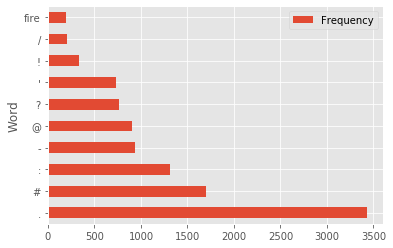

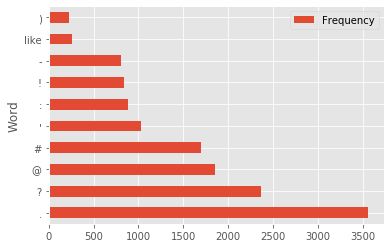

In [17]:
nltk.download('stopwords')
print(string.punctuation)
stop=set(stopwords.words('english'))
stop.add(',')
import matplotlib

def show_word_distrib(target=1, field="clean_text"):
    txt = train[train['target']==target][field].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
    words = nltk.tokenize.word_tokenize(txt)
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stop) 
    
    rslt = pd.DataFrame(words_except_stop_dist.most_common(10),
                        columns=['Word', 'Frequency']).set_index('Word')
    print(rslt)
    matplotlib.style.use('ggplot')

    plott = rslt.plot.barh(rot=0)

print("-- Word distrig Positive Class")

show_word_distrib(target=1)

print("-- Word distrib Negative Class")
show_word_distrib(target=0)

-Hashtag Analysis 
-Number of tweets with hashtags: 7613
-- Hashtag distribution in positive samples 
            Frequency
Word                 
news               56
hiroshima          22
earthquake         19
hot                13
prebreak           13
best               13
japan              11
india              10
yyc                10
breaking            9
-- Hashtag distribution in negative samples 
            Frequency
Word                 
nowplaying         21
news               20
hot                18
prebreak           17
best               17
gbbo               14
jobs               14
islam              14
job                12
hiring             10


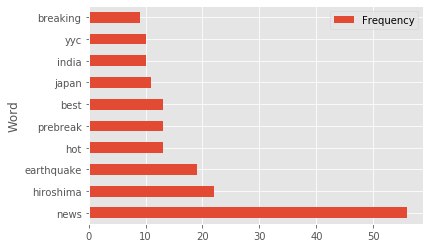

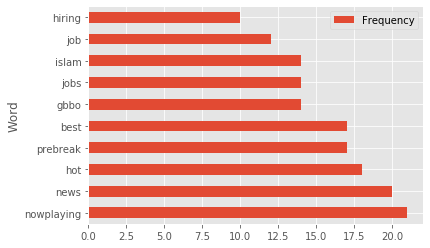

In [18]:
print("-Hashtag Analysis ")
def find_hashtags(tweet):
    return ", ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", tweet)]) or None

def add_hashtags(df):
    from sklearn.feature_extraction.text import CountVectorizer
    
    df['hashtag'] = df["text"].apply(lambda x: find_hashtags(x))
    df['hashtag'].fillna(value="no", inplace=True)
    
    return df
    
top_N = 20

train_me = add_hashtags(train)
_l = len([v for v in train_me.hashtag.values if isinstance(v, str)])
print("-Number of tweets with hashtags: {}".format(_l))
print("-- Hashtag distribution in positive samples ")
show_word_distrib(target=1, field="hashtag")

print("-- Hashtag distribution in negative samples ")
show_word_distrib(target=0, field="hashtag")

In [4]:
all_data = pd.concat([train, test], ignore_index=True)

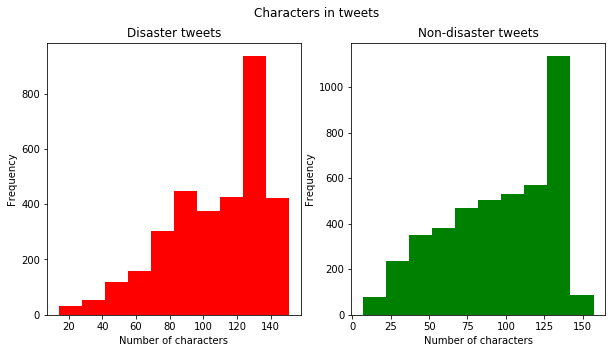

In [5]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=all_data[all_data['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('Disaster tweets')
tweet_len=all_data[all_data['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Non-disaster tweets')
ax1.set(xlabel='Number of characters', ylabel='Frequency')
ax2.set(xlabel='Number of characters', ylabel='Frequency')
fig.suptitle('Characters in tweets')
plt.show()

In [6]:
train[train['target']==0].head(10)


,id,keyword,location,text,target,clean_text
15,23,NaN,NaN,What's up man?,0,what is up man ?
16,24,NaN,NaN,I love fruits,0,i love fruits
17,25,NaN,NaN,Summer is lovely,0,summer is lovely
18,26,NaN,NaN,My car is so fast,0,my car is so fast
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,what a goooooooaaaaaal ! ! ! ! ! !
20,31,NaN,NaN,this is ridiculous....,0,this is ridiculous . . . .
21,32,NaN,NaN,London is cool ;),0,london is cool ; )
22,33,NaN,NaN,Love skiing,0,love skiing
23,34,NaN,NaN,What a wonderful day!,0,what a wonderful day !
24,36,NaN,NaN,LOOOOOOL,0,looooool


In [7]:
train[train['target']==1].head(10)

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this # earthquake ...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask . canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to ' shelter in place ' ar...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13 , 000 people receive # wildfires evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby # alaska as...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,# rocky fire update = > california hwy . 20 cl...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,# flood # disaster heavy rain causes flash flo...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,i am on top of the hill and i can see a fire i...
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,there is an emergency evacuation happening now...
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,i am afraid that the tornado is coming to our ...


In [8]:
def counter_word (text):
    count = Counter()
    for i in text:
        for word in i.split():
            count[word] += 1
    return count

counter_train = counter_word(train['clean_text'])
counter_test = counter_word(test['clean_text'])
print(f"The len of unique words in train is: {len(counter_train)}")
print(f"The len of unique words in test is: {len(counter_test)}")

The len of unique words in train is: 16933
The len of unique words in test is: 10091


In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
# from sklearn.metrics import f1_score
# from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import FunctionTransformer

In [10]:
# train test split with stratify
train = train.drop_duplicates(subset='clean_text', keep='first')
print('length train data', len(train))
print('split 80:20')
X = train.clean_text
y = train.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# summarize train and test composition
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_val[y_val==0]), len(y_val[y_val==1])
print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
cat_0 = train_0 + test_0
cat_1 = train_1 + test_1
print('Train: 0=%f, 1=%f '% (train_0/cat_0, train_1/cat_1))
print('Test: 0=%f, 1=%f'% (test_0/cat_0, test_1/cat_1))

length train data 6944
split 80:20
Train: 0=3283, 1=2272, Test: 0=821, 1=568
Train: 0=0.799951, 1=0.800000 
Test: 0=0.200049, 1=0.200000


In [11]:
# download glove vector
#!wget -O "glove.twitter.27B.zip" "http://nlp.stanford.edu/data/glove.twitter.27B.zip"

In [12]:
#!unzip -j "glove.twitter.27B.zip" "glove.twitter.27B.200d.txt"

In [13]:
random.seed(360)
np.random.seed(360)
torch.manual_seed(360)
torch.backends.cudnn.deterministic = True
torch.cuda.manual_seed_all(360)

In [14]:
word2idx = {}
idx2word = {}
all_data = pd.concat([train, test], ignore_index=True)
all_text = all_data['clean_text']
idx = 1 # index start from one because zero for padding
for text in all_text:
    words = nltk.word_tokenize(text)
    for word in words:
        if word not in word2idx.keys():
            word2idx[word] = idx
            if idx not in idx2word.keys():
                idx2word[idx] = word
                idx += 1

In [15]:
# load glove
GLOVE_DIR = ''
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.twitter.27B.200d.txt'))
for line in tqdm(f, desc='load glove embedding'):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
    
f.close()

In [16]:
# build embedding matrix
embedding_matrix = np.zeros((len(word2idx) + 2, 200)) # +2 for padding and unknown words
for word, idx in tqdm(word2idx.items(), desc='build embedding matrix'):
    try:
        embedding_matrix[idx] = embeddings_index[word]
    except:
        embedding_matrix[-1] = np.random.rand(1, 200)

In [17]:
def generate_data_loader(x, y, maxlen=128, with_target=True, bs=16):
    all_data = []

    for text, label in zip(x, y): 
        tokens = word_tokenize(text)
        token_ids = [word2idx[t] for t in tokens]
        # padding or truncate to maxlen
        if len(token_ids) > maxlen:
            token_ids = token_ids[:maxlen]
        else:
            token_ids = token_ids + ([0] * (maxlen - len(token_ids)))
        
        token_ids_tensor = torch.LongTensor(token_ids)
        
        target = torch.tensor(label)
        data = {
            'token_ids': token_ids_tensor,
            'target' : target
        }
            
        all_data.append(data)
    
    data_loader = DataLoader(all_data, batch_size=bs, num_workers=5)
    
    return data_loader

In [18]:
train_dataloader = generate_data_loader(X_train, y_train)
val_dataloader = generate_data_loader(X_val, y_val)
# all_dataloader = generate_data_loader(X, y)

In [19]:
def get_n_correct(y_true, y_pred):
    """ 
    y_true : tensor,
    y_pred : tensor,
    example: 
    y_true = torch.tensor([0.0, 1.0, 1.0])
    y_pred = torch.tensor([0.3, 0.6, 0.9])
    torch.eq is means equal of each tensor and return True or False, 
    and then the tensor of booleans turn to floats in 1.0 or 0.0
    torch.eq(y_true, torch.round(y_pred)).float() = torch.tensor([1.0, 1.0, 1.0])
    """
    y_pred = torch.sigmoid(y_pred) # apply logits y_pred to sigmoid activation function 
    
    with torch.no_grad():
        n_correct = torch.sum(torch.eq(y_true, torch.round(y_pred)).float()).item()
    return n_correct

In [20]:
def evaluate(data_loader, criterion, model):
    n_val_total, n_val_correct, val_loss_total = 0, 0, 0
    model.eval()
    with torch.no_grad():
        for sample_batched in data_loader:

            inputs = sample_batched['token_ids'].to(device)
            outputs = model(inputs)

            targets = sample_batched['target'].to(device).float().unsqueeze(1)

            loss = criterion(outputs, targets) #y_pred, y

            n_val_correct += get_n_correct(targets, outputs)
            n_val_total += len(outputs)
            val_loss_total += loss.item() * len(outputs)
    
    val_acc = n_val_correct / n_val_total
    val_loss = val_loss_total / n_val_total
    return val_acc, val_loss

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    print(torch.cuda.get_device_name())
    print(device)
else:
    print(device)
    

cpu


In [22]:
class LSTMModel(nn.Module):
    def __init__(self, embedding_matrix, output_size=1, embedding_dim=200, hidden_dim=300, hidden_dim_2=100, 
                 n_layers=1, drop_prob=0.5, bidirectional=False, pooling=False):
        super().__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float))
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, batch_first=True, bidirectional=bidirectional)
        self.dropout = nn.Dropout(drop_prob)
        self.pooling = pooling
        self.bidirectional = bidirectional
        self.fc_b_pool = nn.Linear(hidden_dim*4, hidden_dim*2)
        if self.bidirectional or self.pooling:
            self.fc = nn.Linear(hidden_dim*2, hidden_dim)
            self.fc_out = nn.Linear(hidden_dim, output_size)
        else:
            self.fc = nn.Linear(hidden_dim, hidden_dim_2)
            self.fc_out = nn.Linear(hidden_dim_2, output_size)
    
    def forward(self, x):
        embeds = self.embedding(x)
        len_seq = torch.as_tensor((x != 0).sum(dim=1), dtype=torch.int64) # sum of token ids without padding ids (0s)
        packed_seq = pack_padded_sequence(embeds, len_seq, batch_first=True, enforce_sorted=False)

        out_packed_lstm, (h_lstm, c_lstm) = self.lstm(packed_seq)
        
        if self.pooling:
            out_lstm, _ = pad_packed_sequence(out_packed_lstm, batch_first=True)
            mean_out = torch.mean(out_lstm, dim=1) # lstm: batch_size, 1, hidden | bilstm: batch_size, 2, hidden
            max_out, _ = torch.max(out_lstm, dim=1) # lstm: batch_size, 1, hidden | bilstm: batch_size, 2, hidden
            h_lstm = torch.cat([mean_out, max_out], dim=1) # lstm: batch_size, 2, hidden | bilstm: batch_size, 4, hidden
            h_lstm = h_lstm.view(h_lstm.shape[0], -1) # batch_size, seq_len, hidden > batch_size, hidden
            if self.bidirectional:
                h_lstm = self.fc_b_pool(h_lstm)
        else:
            h_lstm = h_lstm.transpose(0,1) # seq_len, batch_size, hidden > batch_size, seq_len, hidden (lstm: bs, 1, hidden | bilstm or pool: bs, 2, hidden)
            h_lstm = h_lstm.contiguous().view(h_lstm.shape[0], -1) # batch_size, seq_len, hidden > batch_size, hidden
        
        out = self.dropout(self.fc(h_lstm))
        out = self.fc_out(out)
        return out

In [23]:
# train model
def train_model(model, train_dataloader, val_dataloader, learning_rate=1e-3, epochs=50, early_stopping=10, model_name='model_disaster_lstm.pt'):
    # don't worry with higher epochs, we set early stopping
#     wandb.init(project="disaster-tweet-classification", name=model_name)
#     wandb.config.lr = learning_rate

    PATH_OUTPUT_MODEL = ''
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)
#     scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=1, verbose=True)
    criterion = nn.BCEWithLogitsLoss()
    min_val_loss = None
    patience = 0
    list_lr, list_acc, list_loss, list_val_acc, list_val_loss = [], [], [], [], []
    model = model.to(device)
    for i in tqdm(range(epochs), desc='epochs'):
        n_total, n_correct, loss_total = 0, 0, 0

        model.train()

        for sample_batched in tqdm(train_dataloader, desc='batch loader'):
            optimizer.zero_grad()

            inputs = sample_batched['token_ids'].to(device)
            outputs = model(inputs)
            targets = sample_batched['target'].to(device).float().unsqueeze(1)

            loss = criterion(outputs, targets) #y_pred, y_true. y_pred already applied sigmoid by loss function

            loss.backward()
            optimizer.step()

            with torch.no_grad():
                n_correct += get_n_correct(targets, outputs)
                n_total += len(outputs)
                loss_total += loss.item() * len(outputs)

        train_acc = n_correct / n_total
        train_loss = loss_total / n_total

        learning_rate = optimizer.param_groups[0]['lr']
        print(f'Epoch {i} :')
        print('LR:', learning_rate)
        print('Acc:', train_acc)
        print('Loss:', train_loss)

        val_acc, val_loss = evaluate(val_dataloader, criterion, model)

        if min_val_loss == None:
            min_val_loss = val_loss

        if min_val_loss > val_loss:
            min_val_loss = val_loss
            print('Found Best Val Loss...')
            torch.save(model.state_dict(), os.path.join(PATH_OUTPUT_MODEL, model_name))
            patience = 0 # reset patience
        else:
            patience += 1
            scheduler.step()


        print('Val Acc:', val_acc)
        print('Val Loss:', val_loss)

#         wandb.log({"lr":learning_rate, "loss": train_loss, "val_loss": val_loss, 
#                    "acc":train_acc, "val_acc":val_acc})
        
        list_lr.append(learning_rate)
        list_loss.append(train_loss)
        list_val_loss.append(val_loss)
        list_acc.append(train_acc)
        list_val_acc.append(val_acc)
        
        if patience == early_stopping:
            print(f'Validation Loss not decreasing {early_stopping} times in a row..')
            print('Early Stopping..')
            print('Best Val Loss:', min_val_loss)
            break   
    return min_val_loss, (list_lr, list_acc, list_loss, list_val_acc, list_val_loss)

In [24]:
# pd.DataFrame({'train_acc':[0.5, 0.6, 0.9, 0.2, 0.4], 'loss':[], 'lr':[], 'metrics':['a','a','a','b','b'], 'epochs':[1,2,3,1,2], })
class MetricsBuilder(object):
    def __init__(self):
        self.df_metrics = pd.DataFrame({})
        
    def add_metrics(self, tuple_metrics, name='LSTM'):
        list_lr, list_acc, list_loss, list_val_acc, list_val_loss = tuple_metrics
        metrics_data = pd.DataFrame({'acc':list_acc, 'val_acc':list_val_acc, 'loss':list_loss, 'val_loss':list_val_loss, 'lr':list_lr,
                                     'metrics': [name for i in range(len(list_lr))], 'epochs':[i for i in range(len(list_lr))]})
        self.df_metrics = pd.concat([self.df_metrics, metrics_data])
    
    def __get_df_metrics__(self):
        return self.df_metrics

metrics_builder = MetricsBuilder()

In [25]:
lstm_model = LSTMModel(embedding_matrix, bidirectional=False)
min_val_loss_lstm, metrics_lstm = train_model(lstm_model, train_dataloader, val_dataloader, model_name='lstm.pt')


Epoch 0 :
LR: 0.001
Acc: 0.7485148514851485
Loss: 0.5347706465062314
Val Acc: 0.7948164146868251
Val Loss: 0.46719929213314454



Epoch 1 :
LR: 0.001
Acc: 0.787038703870387
Loss: 0.48931891624182866
Found Best Val Loss...
Val Acc: 0.8048956083513319
Val Loss: 0.4565342086480623



Epoch 2 :
LR: 0.001
Acc: 0.7969396939693969
Loss: 0.472703441910439
Found Best Val Loss...
Val Acc: 0.8048956083513319
Val Loss: 0.45583060053374974



Epoch 3 :
LR: 0.001
Acc: 0.7971197119711971
Loss: 0.47024209142857903
Found Best Val Loss...
Val Acc: 0.8106551475881929
Val Loss: 0.44762192285687397



Epoch 4 :
LR: 0.001
Acc: 0.8025202520252025
Loss: 0.4634969813237847
Val Acc: 0.8113750899928006
Val Loss: 0.44987001034576657



Epoch 5 :
LR: 0.001
Acc: 0.8061206120612061
Loss: 0.4567092785526245
Found Best Val Loss...
Val Acc: 0.8149748020158387
Val Loss: 0.43718863612803904



Epoch 6 :
LR: 0.001
Acc: 0.8057605760576058
Loss: 0.4531257683258675
Val Acc: 0.8048956083513319
Val Loss: 0.4466151884771063



Epoch 7 :
LR: 0.0005
Acc: 0.8135013501350135
Loss: 0.43639507420582346
Found Best Val Loss...
Val Acc: 0.8077753779697624
Val Loss: 0.43119054985527



Epoch 8 :
LR: 0.0005
Acc: 0.8154815481548154
Loss: 0.4323682375714974
Val Acc: 0.8048956083513319
Val Loss: 0.4329153933140595



Epoch 9 :
LR: 0.0005
Acc: 0.8136813681368137
Loss: 0.43028117623498696
Val Acc: 0.8020158387329014
Val Loss: 0.43571769079774125



Epoch 10 :
LR: 0.0005
Acc: 0.8154815481548154
Loss: 0.4282262367213985
Val Acc: 0.8048956083513319
Val Loss: 0.43890162326175586



Epoch 11 :
LR: 0.00025
Acc: 0.821962196219622
Loss: 0.4180964197906474
Found Best Val Loss...
Val Acc: 0.8228941684665226
Val Loss: 0.4231692018313233



Epoch 12 :
LR: 0.00025
Acc: 0.8241224122412241
Loss: 0.41339332317308086
Found Best Val Loss...
Val Acc: 0.822174226061915
Val Loss: 0.4209679305081405



Epoch 13 :
LR: 0.00025
Acc: 0.8223222322232223
Loss: 0.41230171642842106
Found Best Val Loss...
Val Acc: 0.8185745140388769
Val Loss: 0.4206912084780982



Epoch 14 :
LR: 0.00025
Acc: 0.8228622862286229
Loss: 0.409815741871575
Val Acc: 0.8156947444204463
Val Loss: 0.42124550691433654



Epoch 15 :
LR: 0.00025
Acc: 0.8226822682268227
Loss: 0.40986298435207535
Val Acc: 0.8185745140388769
Val Loss: 0.4210091228533169



Epoch 16 :
LR: 0.00025
Acc: 0.8241224122412241
Loss: 0.4077232238773716
Val Acc: 0.8228941684665226
Val Loss: 0.42165036936128975



Epoch 17 :
LR: 0.000125
Acc: 0.8293429342934293
Loss: 0.400936620685831
Val Acc: 0.8214542836573074
Val Loss: 0.4235677193230738



Epoch 18 :
LR: 0.000125
Acc: 0.8279027902790279
Loss: 0.4006224236866035
Val Acc: 0.8214542836573074
Val Loss: 0.42260310916354793



Epoch 19 :
LR: 0.000125
Acc: 0.8302430243024302
Loss: 0.39992101278313635
Val Acc: 0.8200143988480921
Val Loss: 0.42165385503147557



Epoch 20 :
LR: 6.25e-05
Acc: 0.8316831683168316
Loss: 0.39793364792311114
Found Best Val Loss...
Val Acc: 0.8178545716342692
Val Loss: 0.417872745712684



Epoch 21 :
LR: 6.25e-05
Acc: 0.8322232223222322
Loss: 0.3956724034798349
Found Best Val Loss...
Val Acc: 0.8171346292296616
Val Loss: 0.41760720813591934



Epoch 22 :
LR: 6.25e-05
Acc: 0.8311431143114312
Loss: 0.39575766173839355
Found Best Val Loss...
Val Acc: 0.8178545716342692
Val Loss: 0.4172393135066681



Epoch 23 :
LR: 6.25e-05
Acc: 0.8309630963096309
Loss: 0.3951760394014183
Found Best Val Loss...
Val Acc: 0.8185745140388769
Val Loss: 0.41689876404230847



Epoch 24 :
LR: 6.25e-05
Acc: 0.8315031503150315
Loss: 0.3947911994694376
Val Acc: 0.8178545716342692
Val Loss: 0.4170196618941124



Epoch 25 :
LR: 6.25e-05
Acc: 0.8318631863186319
Loss: 0.39239286420100666
Val Acc: 0.8171346292296616
Val Loss: 0.41747998749291493



Epoch 26 :
LR: 6.25e-05
Acc: 0.832043204320432
Loss: 0.39325558185631043
Val Acc: 0.8185745140388769
Val Loss: 0.41768738719694387



Epoch 27 :
LR: 3.125e-05
Acc: 0.8334833483348335
Loss: 0.39251337159495436
Found Best Val Loss...
Val Acc: 0.8185745140388769
Val Loss: 0.41636833200959356



Epoch 28 :
LR: 3.125e-05
Acc: 0.8347434743474348
Loss: 0.39049642570484444
Found Best Val Loss...
Val Acc: 0.8185745140388769
Val Loss: 0.41632406976773983



Epoch 29 :
LR: 3.125e-05
Acc: 0.8351035103510351
Loss: 0.3919693713972528
Found Best Val Loss...
Val Acc: 0.8192944564434845
Val Loss: 0.41606349666999176



Epoch 30 :
LR: 3.125e-05
Acc: 0.8351035103510351
Loss: 0.3902966358002299
Found Best Val Loss...
Val Acc: 0.8185745140388769
Val Loss: 0.41601730716837837



Epoch 31 :
LR: 3.125e-05
Acc: 0.8356435643564356
Loss: 0.390048714778801
Val Acc: 0.8207343412526998
Val Loss: 0.4160898831613292



Epoch 32 :
LR: 3.125e-05
Acc: 0.8361836183618362
Loss: 0.3903362066733955
Found Best Val Loss...
Val Acc: 0.8207343412526998
Val Loss: 0.41600039461862276



Epoch 33 :
LR: 3.125e-05
Acc: 0.8361836183618362
Loss: 0.39123672179602803
Val Acc: 0.8200143988480921
Val Loss: 0.4160076379776001



Epoch 34 :
LR: 3.125e-05
Acc: 0.8351035103510351
Loss: 0.391442923949282
Found Best Val Loss...
Val Acc: 0.8200143988480921
Val Loss: 0.4159063902194763



Epoch 35 :
LR: 3.125e-05
Acc: 0.8343834383438344
Loss: 0.38952548467394044
Found Best Val Loss...
Val Acc: 0.8185745140388769
Val Loss: 0.4158288064923022



Epoch 36 :
LR: 3.125e-05
Acc: 0.8365436543654365
Loss: 0.3889893288847351
Val Acc: 0.8192944564434845
Val Loss: 0.4158684682768828



Epoch 37 :
LR: 1.5625e-05
Acc: 0.836003600360036
Loss: 0.38885845652874473
Val Acc: 0.8192944564434845
Val Loss: 0.4158348424817436



Epoch 38 :
LR: 1.5625e-05
Acc: 0.8367236723672368
Loss: 0.38786090305401977
Found Best Val Loss...
Val Acc: 0.8192944564434845
Val Loss: 0.4158032763725223



Epoch 39 :
LR: 1.5625e-05
Acc: 0.8372637263726372
Loss: 0.3866304618578897
Val Acc: 0.8192944564434845
Val Loss: 0.41584299780465955



Epoch 40 :
LR: 1.5625e-05
Acc: 0.8379837983798379
Loss: 0.3883035518517374
Val Acc: 0.8192944564434845
Val Loss: 0.41584639340274365



Epoch 41 :
LR: 7.8125e-06
Acc: 0.8378037803780378
Loss: 0.38703745181473603
Val Acc: 0.8200143988480921
Val Loss: 0.4158485722979511



Epoch 42 :
LR: 7.8125e-06
Acc: 0.8387038703870388
Loss: 0.3875897640773136
Val Acc: 0.8192944564434845
Val Loss: 0.4158505007807002



Epoch 43 :
LR: 7.8125e-06
Acc: 0.8378037803780378
Loss: 0.38721949642408443
Val Acc: 0.8192944564434845
Val Loss: 0.41587652462347535



Epoch 44 :
LR: 3.90625e-06
Acc: 0.8376237623762376
Loss: 0.38795576435987417
Val Acc: 0.8192944564434845
Val Loss: 0.415898706648657



Epoch 45 :
LR: 3.90625e-06
Acc: 0.8387038703870388
Loss: 0.3872460979716827
Val Acc: 0.8192944564434845
Val Loss: 0.4158987639146026



Epoch 46 :
LR: 3.90625e-06
Acc: 0.8374437443744375
Loss: 0.3868576622298985
Val Acc: 0.8192944564434845
Val Loss: 0.41590710957330107



Epoch 47 :
LR: 1.953125e-06
Acc: 0.8376237623762376
Loss: 0.3872380995138822
Val Acc: 0.8192944564434845
Val Loss: 0.4159038608841453



Epoch 48 :
LR: 1.953125e-06
Acc: 0.8381638163816382
Loss: 0.38620810916196324
Val Acc: 0.8192944564434845
Val Loss: 0.4159109350200005
Validation Loss not decreasing 10 times in a row..
Early Stopping..
Best Val Loss: 0.4158032763725223


In [26]:
bilstm_model_pool = LSTMModel(embedding_matrix, bidirectional=True, pooling=True)
min_val_loss_bilstm_pool, metrics_bilstm_pool = train_model(bilstm_model_pool, train_dataloader, val_dataloader, model_name='bilstm_pool.pt')


Epoch 0 :
LR: 0.001
Acc: 0.7665166516651665
Loss: 0.5004141690680618
Val Acc: 0.8099352051835853
Val Loss: 0.4442731072526771



Epoch 1 :
LR: 0.001
Acc: 0.7985598559855985
Loss: 0.4560460913057911
Found Best Val Loss...
Val Acc: 0.8228941684665226
Val Loss: 0.4337475082271815



Epoch 2 :
LR: 0.001
Acc: 0.8064806480648065
Loss: 0.44021751934831793
Found Best Val Loss...
Val Acc: 0.8156947444204463
Val Loss: 0.4276382544643163



Epoch 3 :
LR: 0.001
Acc: 0.8111611161116111
Loss: 0.42803193853445465
Found Best Val Loss...
Val Acc: 0.8156947444204463
Val Loss: 0.4220805133178648



Epoch 4 :
LR: 0.001
Acc: 0.8174617461746174
Loss: 0.42009297059019013
Found Best Val Loss...
Val Acc: 0.8135349172066235
Val Loss: 0.41743329478477387



Epoch 5 :
LR: 0.001
Acc: 0.8228622862286229
Loss: 0.41236591939717987
Val Acc: 0.8092152627789777
Val Loss: 0.42177582158297405



Epoch 6 :
LR: 0.001
Acc: 0.823042304230423
Loss: 0.41023377329915844
Val Acc: 0.8070554355651548
Val Loss: 0.41880267386474224



Epoch 7 :
LR: 0.0005
Acc: 0.8329432943294329
Loss: 0.39162303513900104
Val Acc: 0.8149748020158387
Val Loss: 0.41793094344753595



Epoch 8 :
LR: 0.0005
Acc: 0.8363636363636363
Loss: 0.38271742902501654
Val Acc: 0.8178545716342692
Val Loss: 0.41829646013467925



Epoch 9 :
LR: 0.0005
Acc: 0.8370837083708371
Loss: 0.37873057452785763
Val Acc: 0.816414686825054
Val Loss: 0.418892690459973



Epoch 10 :
LR: 0.00025
Acc: 0.8435643564356435
Loss: 0.3653710846907378
Found Best Val Loss...
Val Acc: 0.8250539956803455
Val Loss: 0.4113557695098023



Epoch 11 :
LR: 0.00025
Acc: 0.8498649864986498
Loss: 0.3612598725501532
Val Acc: 0.8236141108711303
Val Loss: 0.4116921525923274



Epoch 12 :
LR: 0.00025
Acc: 0.8516651665166517
Loss: 0.35624699587359504
Val Acc: 0.827933765298776
Val Loss: 0.41147894119941736



Epoch 13 :
LR: 0.00025
Acc: 0.8504050405040504
Loss: 0.35481892106342056
Val Acc: 0.822174226061915
Val Loss: 0.41246639079460573



Epoch 14 :
LR: 0.000125
Acc: 0.8586858685868587
Loss: 0.34474019567967534
Val Acc: 0.8264938804895609
Val Loss: 0.4136323633169939



Epoch 15 :
LR: 0.000125
Acc: 0.85994599459946
Loss: 0.3413907160323606
Val Acc: 0.8243340532757379
Val Loss: 0.4136762791095319



Epoch 16 :
LR: 0.000125
Acc: 0.8612061206120613
Loss: 0.3395300929069948
Val Acc: 0.8250539956803455
Val Loss: 0.41430407987815



Epoch 17 :
LR: 6.25e-05
Acc: 0.861026102610261
Loss: 0.33343687374362746
Val Acc: 0.8243340532757379
Val Loss: 0.4155762066636865



Epoch 18 :
LR: 6.25e-05
Acc: 0.8633663366336634
Loss: 0.33156840974258794
Val Acc: 0.8243340532757379
Val Loss: 0.4155724425810202



Epoch 19 :
LR: 6.25e-05
Acc: 0.8637263726372637
Loss: 0.32969610508259733
Val Acc: 0.8236141108711303
Val Loss: 0.41620301854876496



Epoch 20 :
LR: 3.125e-05
Acc: 0.866066606660666
Loss: 0.3269698776935104
Val Acc: 0.8214542836573074
Val Loss: 0.41624410344251545
Validation Loss not decreasing 10 times in a row..
Early Stopping..
Best Val Loss: 0.4113557695098023


In [27]:
metrics_builder.add_metrics(metrics_lstm, name='LSTM')
metrics_builder.add_metrics(metrics_bilstm_pool, name='BiSTM_Pool')

In [28]:
df_metrics = metrics_builder.__get_df_metrics__()

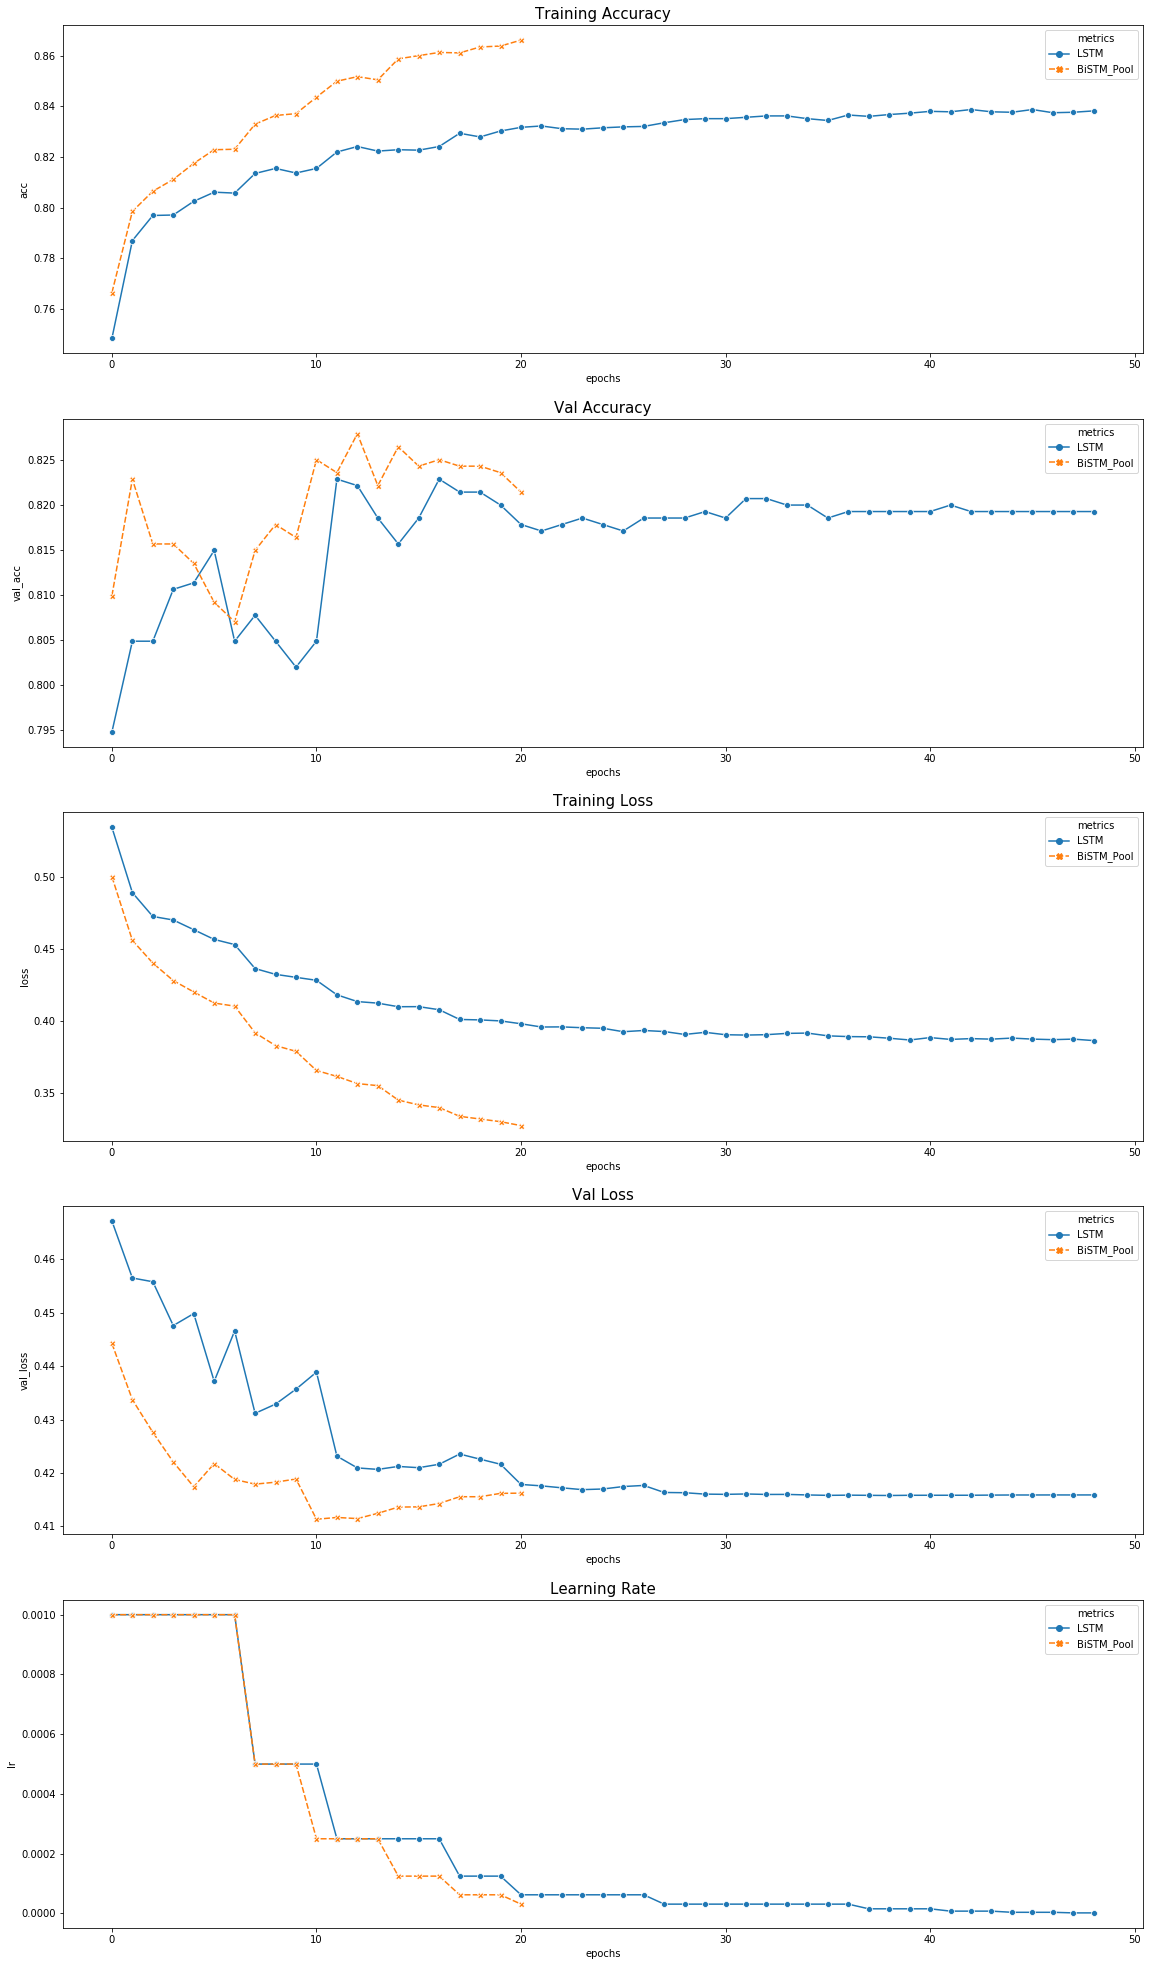

In [29]:
fig, ax = plt.subplots(5, figsize=(15,35))
ax1, ax2, ax3, ax4, ax5 = ax
sns.lineplot(x='epochs', y='acc', data=df_metrics, hue="metrics", style='metrics',
                  markers=True, ax=ax1).set_title('Training Accuracy', fontsize=15)
sns.lineplot(x='epochs', y='val_acc', data=df_metrics, hue="metrics", style='metrics',
                  markers=True, ax=ax2).set_title('Val Accuracy', fontsize=15)
sns.lineplot(x='epochs', y='loss', data=df_metrics, hue="metrics", style='metrics',
                  markers=True, ax=ax3).set_title('Training Loss', fontsize=15)
sns.lineplot(x='epochs', y='val_loss', data=df_metrics, hue="metrics", style='metrics',
                  markers=True, ax=ax4).set_title('Val Loss', fontsize=15)
sns.lineplot(x='epochs', y='lr', data=df_metrics, hue="metrics", style='metrics',
                  markers=True, ax=ax5).set_title('Learning Rate', fontsize=15)

plt.subplots_adjust(left=3, right=4)

plt.show()

In [30]:
# GENERATING SUBMISSION
model = LSTMModel(embedding_matrix, bidirectional=True, pooling=True).to(device)
model.load_state_dict(torch.load('bilstm_pool.pt', map_location=device))

<All keys matched successfully>

In [31]:
def predict_test_set(data_loader, model):
    model.eval()
    all_outputs = []
    with torch.no_grad():
        for sample_batched in data_loader:

            inputs = sample_batched.to(device)
            outputs = model(inputs)
            outputs = (torch.sigmoid(outputs).squeeze(1) > 0.5).long().tolist()

            all_outputs.extend(outputs)
    
    return all_outputs

In [32]:
def generate_test_data_loader(x, maxlen=128, bs=16):
    all_data = []

    for text in x: 
        tokens = word_tokenize(text)
        token_ids = [word2idx[t] for t in tokens]
        # padding or truncate to maxlen
        if len(token_ids) > maxlen:
            token_ids = token_ids[:maxlen]
        else:
            token_ids = token_ids + ([0] * (maxlen - len(token_ids)))
        
        token_ids_tensor = torch.LongTensor(token_ids)           
        all_data.append(token_ids_tensor)
    
    data_loader = DataLoader(all_data, batch_size=bs, num_workers=5)
    
    return data_loader


In [33]:
test_dataloader = generate_test_data_loader(test['clean_text'])
predicted_target = predict_test_set(test_dataloader, model)

In [34]:
my_submission = pd.DataFrame({'Id': test.id, 'target': predicted_target})
my_submission.to_csv('submission.csv', index=False)